In [1]:
import holoviews as hv
import geoviews as gv
import iris

hv.notebook_extension()

/home/h06/cbosley/miniconda2/envs/cube_explorer/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Preparing Your Cube

When using any iris data set, the first thing you have to do is load your cube(s).  To be able to use this cube with Holoviews, Geoviews, and/or a Cube Browser, you need to turn this cube into a Holoviews Dataset.

In [2]:
cube = iris.load_cube((iris.sample_data_path('GloSea4', 'ensemble_001.pp')))
print cube

surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          forecast_period                x            -               -
     Scalar coordinates:
          forecast_reference_time: 2011-07-18 00:00:00
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour)


In [3]:
surface_temp = hv.Dataset(cube)
print surface_temp

<Dataset Dataset00861>


# Constructing a Plot

You will now need to decide what type of plot you wish to make using your dataset.  The types of plot that you have available are called [Elements](http://holoviews.org/Tutorials/Elements.html) and are analogous to those used by Matplotlib.  Additionally, you have the option of using various Layout or Overlay options as your Element.  These will be described in more detail in the [Options](options_example.ipynb) section.

Here, we will use the Element 'Image' as an example.

/home/h06/cbosley/miniconda2/envs/cube_explorer/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1334: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


:HoloMap   [time]
   :Image   [latitude,longitude]   (surface_temperature)
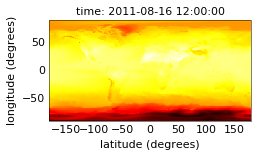
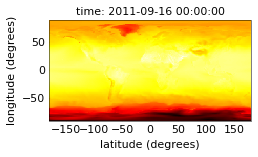
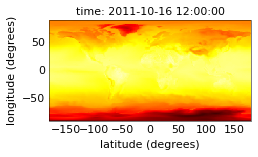
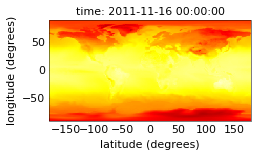
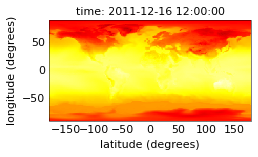
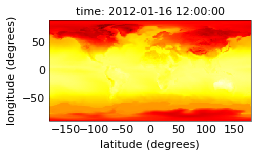

In [4]:
plot1 = surface_temp.to.image(['latitude', 'longitude'])
plot1

You can see that in the syntax above, we have selected the coordinates we wish to use as our x and y axis, and the remaining coordinate has been turned into a slider.  This is applicable to cubes with a higher number of dimensions; those that are not a plot axis will become a slider.

It is also possible to pass in some plotting options as a callable using a slightly different syntax.

:DynamicMap   [longitude,latitude]
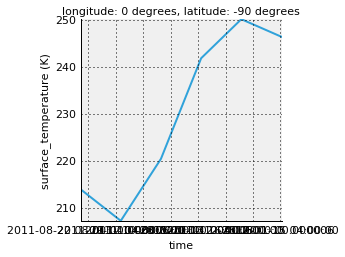

In [17]:
plot2 = surface_temp.to(hv.Curve, ['time'], dynamic=True)
plot2



Note:

The 'dynamic' keyword is used to reduce your memory footprint.  When dynamic=True, the notebook will only load the slice of data you are currently viewing, so each time you move a slider a new slice of data will be loaded.  This prevents the entire cube being loaded for each plot, but can cause complications with some plot types (such as hv.NdLayout, which requires mutliple slices at once).



You can access more in-depth tutorials and guidelines on plotting via the [Holoviews](http://holoviews.org/index.html) and [Geoviews](http://geo.holoviews.org/) websites.